In [ ]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.callbacks import TensorBoard
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf

In [ ]:
# Get images
from PIL import Image
import IPython.display as display

# Replace 'image.jpg' with the filename of your uploaded image
uploaded_image_path = '/content/bw.png'
image = img_to_array(load_img(uploaded_image_path))
image = np.array(image, dtype=float)

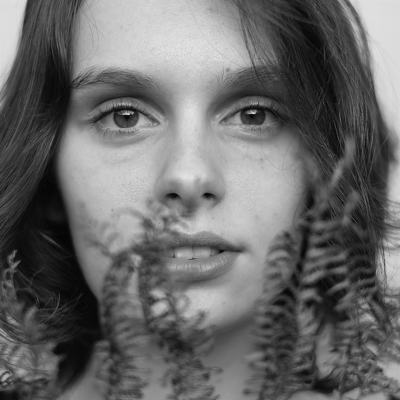

In [ ]:
from PIL import Image
import IPython.display as display

# Replace 'image.jpg' with the filename of your uploaded image
uploaded_image_path = '/content/bw.png'

# Open the uploaded image
image = Image.open(uploaded_image_path)

# Display the image
display.display(image)


In [ ]:
import numpy as np
from skimage.color import rgb2lab

# Assuming 'image' is your original RGB image with shape (400, 400, 3)
# Convert RGB image to LAB color space and extract L channel (X) and AB channels (Y)
image_lab = rgb2lab(1.0/255 * image)
X = image_lab[:, :, 0]  # L channel (grayscale)
Y = image_lab[:, :, 1:]  # AB channels

# Normalize the values in Y to the range [-1, 1]
Y /= 128

# Add batch dimension to X and Y
X = X.reshape(1, 400, 400, 1)  # Shape: (1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)  # Shape: (1, 400, 400, 2)

# Print the shape of X and Y
print("X shape:", X.shape)  # Should be (1, 400, 400, 1)
print("Y shape:", Y.shape)  # Should be (1, 400, 400, 2)




X shape: (1, 400, 400, 1)
Y shape: (1, 400, 400, 2)


In [ ]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [ ]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')

In [ ]:
model.fit(x=X,
    y=Y,
    batch_size=1,
    epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.3898
Epoch 2/1000
1/1 [==============================] - 0s 265ms/step - loss: 0.0546
Epoch 3/1000
1/1 [==============================] - 0s 255ms/step - loss: 0.0329
Epoch 4/1000
1/1 [==============================] - 0s 238ms/step - loss: 0.0519
Epoch 5/1000
1/1 [==============================] - 0s 246ms/step - loss: 9.3259e-04
Epoch 6/1000
1/1 [==============================] - 0s 250ms/step - loss: 7.7548e-04
Epoch 7/1000
1/1 [==============================] - 0s 243ms/step - loss: 6.7853e-04
Epoch 8/1000
1/1 [==============================] - 0s 240ms/step - loss: 6.0722e-04
Epoch 9/1000
1/1 [==============================] - 0s 243ms/step - loss: 5.5116e-04
Epoch 10/1000
1/1 [==============================] - 0s 242ms/step - loss: 5.0609e-04
Epoch 11/1000
1/1 [==============================] - 0s 235ms/step - loss: 4.6911e-04
Epoch 12/1000
1/1 [==============================] - 0s 241ms/step - loss: 4.3902e

In [ ]:
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
imsave("img_result1.png", lab2rgb(cur))
imsave("img_gray_version1.png", rgb2gray(lab2rgb(cur)))
print(rgb2gray(lab2rgb(cur)))

1/1 [==============================] - 0s 153ms/step - loss: 2.2015e-07
2.2014833689354418e-07
1/1 [==============================] - 0s 128ms/step


[[0.86274513 0.85882356 0.86274513 ... 0.86666646 0.86666616 0.86274341]
 [0.85882356 0.86274513 0.86274513 ... 0.86666641 0.86274208 0.8666662 ]
 [0.86274513 0.86274513 0.85882356 ... 0.86274512 0.86274488 0.85882208]
 ...
 [0.04312958 0.04705828 0.05098037 ... 0.33725486 0.36862575 0.38039097]
 [0.04705101 0.04705673 0.05098037 ... 0.25882342 0.29411699 0.30196034]
 [0.03529435 0.04313645 0.05098005 ... 0.1529407  0.21176469 0.21568607]]
